# The examples of section 3 
## You just need to run the entire notebook.

## Importing libraries : 

In [1]:
from FIF import *
import matplotlib.pyplot as plt
import matplotlib

# The example of the dictionaries discussion :

### Constructing the dataset

In [2]:
np.random.seed(1)
m =100
n =30
tps = np.linspace(0,0.7,m)
v = np.linspace(0.5,0.55,n)
X = np.zeros((n,m))
Y = np.zeros((10,m))
for i in range(n):
    for j in range(30):
        X[i,j] = 30 * ((1-tps[j]) ** v[i]) * tps[j] ** v[i]
    for j in range(30,m):
        X[i,j] = X[i,29]+np.random.normal(0,0.3,1)
y = X[0,:].copy()
y[10:25] +=0.8
y[25:30] = y[24]
y[30:m] = y[24] + np.random.normal(0,0.05,m-30)-0.5
y = y.reshape(1,-1)
X_f = np.concatenate((X.copy(),y),axis= 0)




### Function to simulate Brownian motion :

In [3]:
def simul_Brownien_Drift(n = 100,m = 1000,sigma = 0.5,mu = 2,T = 1):
    tps = np.linspace(0,T,m) # Discrétisation du temps
    B = np.zeros((n,m))
    B[:,0] = np.random.normal(0,scale = 0.5,size = n) # départ du MB à 0
    for i in range(1,np.size(tps)):
        B[:,i] = B[:, i-1] + sigma*np.random.normal(0,np.sqrt(tps[2]-tps[1]),n)+ mu*(tps[2]-tps[1]) 
    return B;

### Constructing both dictionaries :

In [4]:
D1 = simul_Brownien_Drift(n=100, m = 100, sigma = 0.3, mu = 0, T =1)
DD = np.zeros((400,100))
DD[:,0:25] = 1 
D = np.concatenate((D1,DD), axis = 0)

### Applying FIF with both dictionaries :

In [5]:
F2  = FIForest(X_f, ntrees=100,time = tps, subsample_size= 11,
               limit = 3,  D= D, innerproduct= 'auto', Dsize = 100, alpha = 1)
S2 =F2.compute_paths()
F3  = FIForest(X_f, ntrees=100,time = tps, subsample_size= 11, 
               limit = 3, D= D1, innerproduct= 'auto', Dsize = 100, alpha = 1)
S3 =F3.compute_paths()

### Plotting the figure :

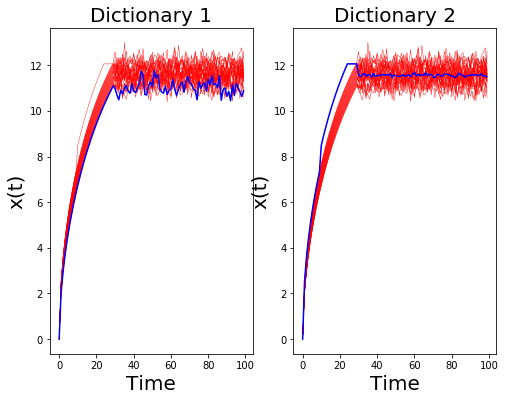

In [6]:
plt.figure(figsize=(8,6))
plt.subplot(121)
for j in range(0,len(S3)):
    plt.plot( X_f[np.argsort(S3)[30-j],:], '-', c="red", zorder=1,linewidth = 0.4, linestyle='-')
    plt.xlabel('Time',size = 20)
    plt.ylabel('x(t)',size = 20)
    plt.title('Dictionary 1', size = 20)
    
plt.plot(X_f[np.argsort(S3)[30],:],c="blue") 
    
plt.subplot(122)   
for j in range(0,len(S2)):
    plt.plot(X_f[np.argsort(S2)[30-j],:], '-', c="red", zorder=1,linewidth = 0.4, )
    plt.xlabel('Time', size = 20)
    plt.ylabel('x(t)',size = 20)
    plt.title('Dictionary 2',size = 20)

plt.plot(X_f[np.argsort(S2)[30],:],c="blue") 

#plt.savefig('dictionary_example.png')
plt.show()

# The example of the scalar product discussion :

### Constructing the dataset :

In [7]:
m =100
n =100
tps = np.linspace(0,1,m)
v = np.linspace(1,1.4,n)
X = np.zeros((n,m))
Y = np.zeros((10,m))
for i in range(n):
    X[i] = 30 * ((1-tps) ** v[i]) * tps ** v[i]
for i in range(10):
    for j in range(m):
        if (tps[j]<0.2 or tps[j]>0.8):
            Y[i,j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 
        else:
            Y[i,j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + np.random.normal(0,0.3,1)
Y[:,0] = 0
Y[:,m-1] = 0
Z = np.concatenate((X,Y), axis = 0)



### Applying FIF :

In [8]:
# L2 scalar product :
F1  = FIForest(Z, D="Brownian", time=tps, innerproduct="auto", alpha=1)
S1  = F1.compute_paths()

# L2 derivate scalar product :
F2  = FIForest(Z, D="Brownian", time=tps, innerproduct="auto", alpha=0)
S2  = F2.compute_paths()

### Plotting the figure :

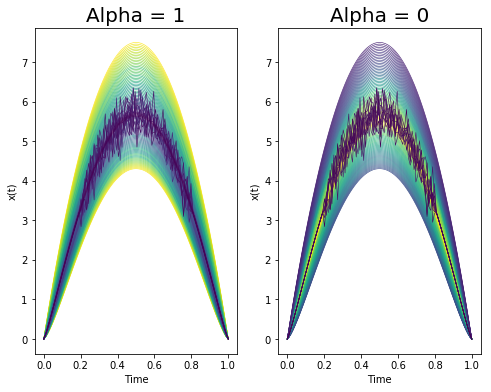

In [9]:
colors = [ matplotlib.cm.viridis_r(x)
            for x in np.linspace(0, 1, len(S2)) ]
plt.figure(figsize=(8,6))
plt.subplot(121)
for j in range(0,len(colors)):
    plt.plot(tps, Z[np.argsort(S1)[109-j],:], '-', c=colors[j], zorder=1, linewidth = 0.6)
    plt.xlabel('Time')
    plt.ylabel('x(t)')
    plt.title('Alpha = 1', size=20)
plt.subplot(122)
for j in range(0,len(colors)):
    plt.plot(tps, Z[np.argsort(S2)[j],:], '-', c=colors[j], zorder=1, linewidth = 0.6)
    plt.xlabel('Time')
    plt.ylabel('x(t)')
    plt.title('Alpha = 0', size=20)

  
    
sm = plt.cm.ScalarMappable(cmap=matplotlib.cm.viridis_r,
 
                                   norm=plt.Normalize(vmin=0, vmax=1))
 
sm._A = []
plt.show()